In [21]:
import pickle as pkl
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from scoring_tables import make_table
from twcrpss_plot import make_twcrpss_plot
from src.models.emos import EMOS
from reliability_diagram import make_reliability_diagram

In [2]:
neighbourhood_size = 11
parameter_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']
ignore = ['229', '285', '323']
train_folds = [1, 2]
train_data = get_normalized_tensor(neighbourhood_size, parameter_names, train_folds, ignore)

X_train = train_data['X']
y_train = train_data['y']
variances_train = train_data['variances']
mean_train = train_data['mean']
std_train = train_data['std']


print(X_train.shape)

(15733, 5)


In [3]:
test_fold = 3

X_test, y_test, variances_test = get_tensors(neighbourhood_size, parameter_names, test_fold, ignore)
X_test = (X_test - mean_train) / std_train

print(X_test.shape)

(7780, 5)


In [4]:
# load the dictionary with the data from /net/pc200239/nobackup/users/hakvoort/models
with open('/net/pc200239/nobackup/users/hakvoort/models/emos_crps.pkl', 'rb') as f:
    models_crps = pkl.load(f)

with open('/net/pc200239/nobackup/users/hakvoort/models/emos_twcrps.pkl', 'rb') as f:
    models_twcrps = pkl.load(f)

In [5]:
emos_crps = {}

for key, value in models_crps.items():
    emos_crps[key] = EMOS(value)

emos_twcrps = {}

for key, value in models_twcrps.items():
    emos_twcrps[key] = EMOS(value)

Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given parameters for Frechet distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameter for Mixture distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given weight parameter for Mixture distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Frechet distribution
Using given weight parameter for Mixture distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Ext

There are 423 values in the PIT diagram


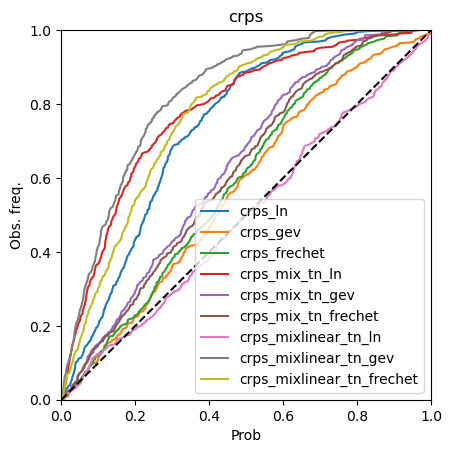

There are 423 values in the PIT diagram


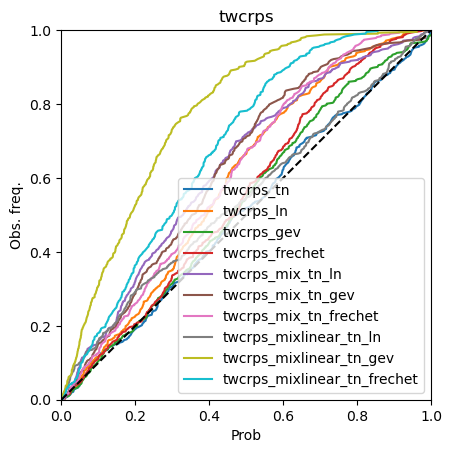

In [15]:
# pit diagrams:
c = 12
make_cpit_diagram_emos(emos_crps, X_test, y_test, variances_test, "crps models", c)

make_cpit_diagram_emos(emos_twcrps, X_test, y_test, variances_test, "twcrps", c)

There are 423 values in the PIT histogram


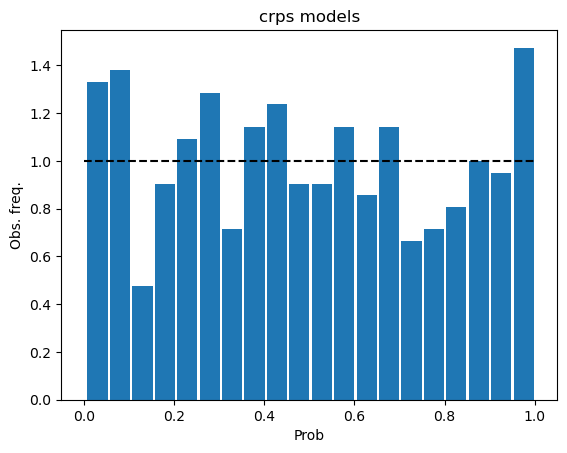

In [17]:
c = 12
bins = 20
make_cpit_hist_emos(base_model, X_test, y_test, variances_test, bins, "crps models", c)

In [6]:
base_model = emos_crps.pop('crps_tn')


In [7]:
samples = 2000
print('crps_tn: ', base_model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())
for key, model in emos_crps.items():
    print(key, model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())



crps_tn:  0.89047813
crps_ln 1.0310996
crps_gev 0.89118224
crps_frechet 0.89456207
crps_mix_tn_ln 0.89023423
crps_mix_tn_gev 0.8848873
crps_mix_tn_frechet 0.8846378
crps_mixlinear_tn_ln 0.8957225
crps_mixlinear_tn_gev 0.8893961
crps_mixlinear_tn_frechet 0.88827074


In [8]:
for key, model in emos_twcrps.items():
    print(key, model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())

twcrps_tn 0.8988112
twcrps_ln 1.1885184
twcrps_gev 0.90077835
twcrps_frechet 0.9035242
twcrps_mix_tn_ln 0.915186
twcrps_mix_tn_gev 0.901302
twcrps_mix_tn_frechet 0.89570796
twcrps_mixlinear_tn_ln 0.905796
twcrps_mixlinear_tn_gev 0.8976024
twcrps_mixlinear_tn_frechet 0.89555806


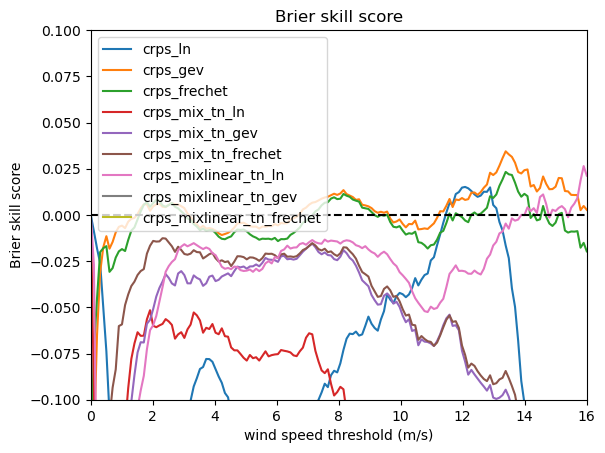

In [9]:
values = np.linspace(0,16, 160)
ylim = [-0.1, 0.1]
brier_skill_plot(base_model, emos_crps, X_test, y_test, variances_test, values, ylim)

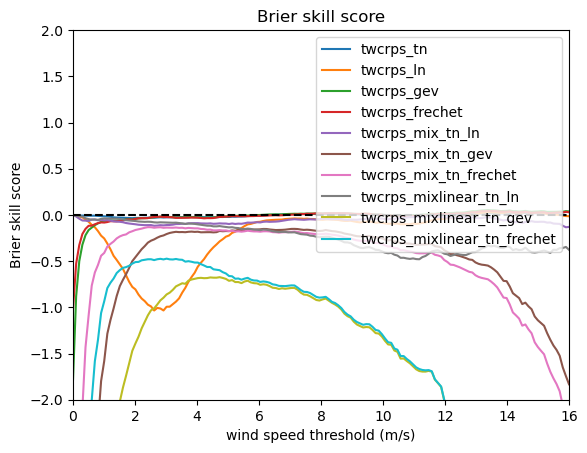

In [20]:
ylim = [-2, 2]
brier_skill_plot(base_model, emos_twcrps, X_test, y_test, variances_test, values, ylim)

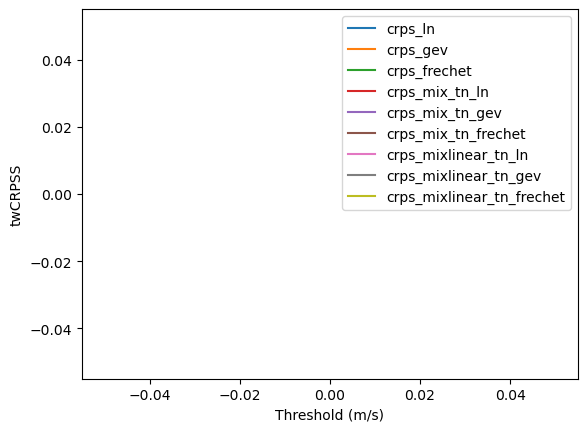

KeyboardInterrupt: 

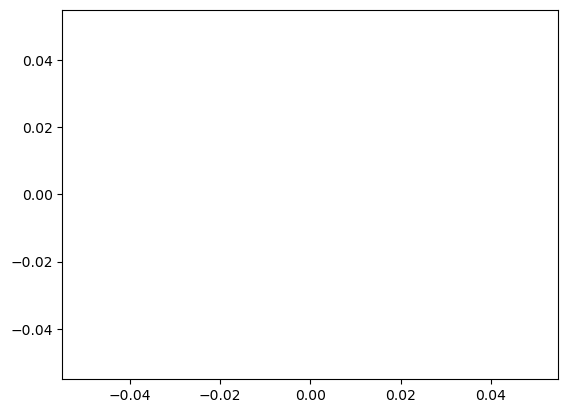

In [24]:
values = np.linspace(0,16, 80)
ylim = [-0.1, 0.1]
make_twcrpss_plot(base_model, emos_crps, X_test, y_test, variances_test, values, ylim)
make_twcrpss_plot(base_model, emos_twcrps, X_test, y_test, variances_test, values, ylim)